#Integrated Waveguides

Question: A waveguide has a core refractive index, n1 = 1.46 and cladding refractive index, n2 = 1.44 Make a TE-mode chart table and plot the TE-mode chart for the first three-guided modes.

In [10]:
# @title Input Parameters
# @markdown Required Input
core_n1 = 1.46  # @param {type: "number"}
clading_n2 = 1.44  # @param {type: "number"}
smoothing=1  # @param {type: "number"}
number_of_guided_modes = 3  # @param {type: "number"}
# @markdown ---

In [11]:
import math
from IPython.display import display, Math
import numpy as np

# @title Step1 find the critical theta  & create thetas list from theta_c to 90 degree
# Display the equation
# LaTeX expression
expression = r"\theta_c= sin^{-1}\left(\frac{n_2}{n_1}\right)"

# Display the expression
display(Math(expression))
# Calculate cretical θ
n1=core_n1
n2=clading_n2
if n2 >= n1:
  print("Total internal reflection is not possible if n2 is not less than n1")
else:
  sin_theta_c = n2 / n1
  theta_c =round(math.degrees(math.asin(sin_theta_c)),3)
  print(f"theta_c = {theta_c} degrees")

#create theat list from crtical theta to 90 degree
thetas= [theta_c]
# for d in np.arange(theta_c, 90+smoothing, smoothing):
#   print(d)
#   thetas.append(d)
# thetas[-1]=math.floor(th[-1])
for i in range(int(theta_c+smoothing),90+smoothing,smoothing):

  thetas.append(i)
#
print(f'Thetas List {thetas}')

<IPython.core.display.Math object>

theta_c = 80.505 degrees
Thetas List [80.505, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


In [12]:
# @title Step 2 Calculate the effective index Neff
# Using n1*sin(theta)
print("Using n1*sin(theta)")
neff=[]
for theta in thetas:
  neff.append(round(n1*math.sin(math.radians(theta)),3))
print(f'neff {neff}')

Using n1*sin(theta)
neff [1.44, 1.442, 1.446, 1.449, 1.452, 1.454, 1.456, 1.458, 1.459, 1.46, 1.46]


In [13]:
# @title Step 3 Calculate tan(hd/2)
import math
from IPython.display import display, Math

def calculate_value(n1, n2, theta_degrees):
    """
    Calculate the specified optical parameter using the given equation and display the equation in LaTeX.

    Parameters:
    - n1 (float): Refractive index of the denser medium (e.g., optical fiber core)
    - n2 (float): Refractive index of the less dense medium (e.g., cladding)
    - theta_degrees (float): Angle of incidence in degrees

    Returns:
    - float: Computed value based on the provided formula, or None if the calculation is not possible
    """
    theta = math.radians(theta_degrees)  # Convert degrees to radians
    sin_theta = math.sin(theta)
    cos_theta = math.cos(theta)

    # Inside the square root
    inside_sqrt = (n1**2 * sin_theta**2) - n2**2

    if inside_sqrt < 0:
        return 0


    # Calculate the value
    result = (1 / (n1 * cos_theta)) * math.sqrt(inside_sqrt)
    # if result > 100:
    #     return "infinity"


    return result

# Display the equation
display(Math(r"\frac{1}{n_1 \cos(\theta)} \sqrt{n_1^2 \sin^2(\theta) - n_2^2}"))




tan_hd_2=[]
for theta in thetas:
  s=round(calculate_value(n1, n2, theta),3)
  if s<0.1:
    s=0
  tan_hd_2.append(s)
print(f"Calculated values : {tan_hd_2}")



<IPython.core.display.Math object>

Calculated values : [0, 0.334, 0.636, 0.912, 1.221, 1.607, 2.143, 2.989, 4.62, 9.399, 2693892647402691.5]


In [14]:
# @title Step 4 Calculate hd
# Using hd = tan^-1(tan(hd/2)) then convert to radions
# LaTeX expression
# LaTeX expression
expression = r"hd = \tan^{-1} \left( \tan \left( \frac{hd}{2} \right) \right)"

# Display the expression
display(Math(expression))
hd=[]

for h in tan_hd_2:
  chd=round(2*math.atan(h),3)
  if chd<0.1:
    chd=0
  hd.append(chd)
print(f"hd {hd}")

<IPython.core.display.Math object>

hd [0, 0.645, 1.133, 1.479, 1.769, 2.028, 2.268, 2.496, 2.715, 2.93, 3.142]


In [15]:
# @title Step 5 Calculate 2π.n1.cosθ
# Using 2π.n1.cosθ
# LaTeX expression
expression = r"2\pi n_1 \cos\theta"

# Display the expression
display(Math(expression))
pi2_n1_cos_theta=[]
for theta in thetas:
  pi2_n1_cos_theta.append(round(2*3.14*n1*math.cos(math.radians(theta)),3))
print(f"pi2_n1_cos_theta {pi2_n1_cos_theta}")

<IPython.core.display.Math object>

pi2_n1_cos_theta [1.512, 1.434, 1.276, 1.117, 0.958, 0.799, 0.64, 0.48, 0.32, 0.16, 0.0]


In [16]:
# @title Step 6 calculate (d/λ)
import numpy as np
from IPython.display import display, Math

# Define the equation in LaTeX
equation = r"\frac{d}{\lambda} = \frac{hd}{2\pi n_1 \cos(\theta)}"

# Display the equation
display(Math(equation))

result = []
for a, b in zip(hd, pi2_n1_cos_theta):
  try:
    result.append(a / b)
  except ZeroDivisionError:
    result.append(float('inf'))  # Or any other value you prefer

d_lamda=[]
# result = np.divide(hd, pi2_n1_cos_theta)
for r in result:
  d_lamda.append(round(r,2))

print(f"(d/λ) {d_lamda}")

<IPython.core.display.Math object>

(d/λ) [0.0, 0.45, 0.89, 1.32, 1.85, 2.54, 3.54, 5.2, 8.48, 18.31, inf]


In [17]:
# @title Step 7 caluclate Δ(d/λ)
# LaTeX expression
expression = r"\Delta \left( \frac{d}{\lambda} \right) = \frac{1}{2 n_1 \cos \theta}"

# Display the expression
display(Math(expression))
delta_d_lamda=[]
for theta in thetas:
    theta_radians = math.radians(theta)  # Convert degrees to radians
    cos_theta = math.cos(theta_radians)

    delta_d_lambda2 = 1 / (2 * n1 * cos_theta)
    delta_d_lamda.append(round(delta_d_lambda2,3))

print(f"Δ(d/λ) {delta_d_lamda}")

<IPython.core.display.Math object>

Δ(d/λ) [2.076, 2.189, 2.461, 2.81, 3.276, 3.929, 4.909, 6.544, 9.813, 19.623, 5592890189450469.0]


In [18]:
# @title Calculate the other number of guided modes
print(f"number of guided modes {number_of_guided_modes}")
print("mode 0")
print(d_lamda)

mode1=[x + y for x, y in zip(d_lamda, delta_d_lamda)]
print("mode 1")
print(mode1)

modes=[mode1]

# print(modes)
# for d in d_lamda:
#     t= d+delta_d_lamdas[d.index]
#     mode0.append(t)
# print (mode0)

for i in range(number_of_guided_modes-2):
  print(f"mode {i+2}")

  mode=[x + y for x, y in zip(delta_d_lamda,modes[i])]
  modes.append(mode)
  print(mode)


number of guided modes 3
mode 0
[0.0, 0.45, 0.89, 1.32, 1.85, 2.54, 3.54, 5.2, 8.48, 18.31, inf]
mode 1
[2.076, 2.6390000000000002, 3.351, 4.13, 5.1259999999999994, 6.468999999999999, 8.449, 11.744, 18.293, 37.933, inf]
mode 2
[4.152, 4.828, 5.811999999999999, 6.9399999999999995, 8.402, 10.398, 13.358, 18.288, 28.106, 57.556, inf]


In [22]:
# @title TE mode table
import pandas as pd
# Creating a DataFrame
t0modetable = pd.DataFrame({
    'θ': thetas,
    'neff': neff,
    'tan(hd/2)': tan_hd_2,
    'hd': hd,
    '2π.n1.cosθ': pi2_n1_cos_theta,
    '(d/λ) TE0': d_lamda,
    'Δ(d/λ)': delta_d_lamda
})

for m in modes:
  t0modetable[f'TE {modes.index(m)+1}'] = m

t0modetable = t0modetable.where(t0modetable <= 1000, np.inf)

# Set display options
pd.set_option('display.max_colwidth', None)  # Display full column width
pd.options.display.float_format = '{:.3f}'.format
display(t0modetable)

,θ,neff,tan(hd/2),hd,2π.n1.cosθ,(d/λ) TE0,Δ(d/λ),TE 1,TE 2
0,80.505,1.440,0.000,0.000,1.512,0.000,2.076,2.076,4.152
1,81.000,1.442,0.334,0.645,1.434,0.450,2.189,2.639,4.828
2,82.000,1.446,0.636,1.133,1.276,0.890,2.461,3.351,5.812
3,83.000,1.449,0.912,1.479,1.117,1.320,2.810,4.130,6.940
4,84.000,1.452,1.221,1.769,0.958,1.850,3.276,5.126,8.402
5,85.000,1.454,1.607,2.028,0.799,2.540,3.929,6.469,10.398
6,86.000,1.456,2.143,2.268,0.640,3.540,4.909,8.449,13.358
7,87.000,1.458,2.989,2.496,0.480,5.200,6.544,11.744,18.288
8,88.000,1.459,4.620,2.715,0.320,8.480,9.813,18.293,28.106
9,89.000,1.460,9.399,2.930,0.160,18.310,19.623,37.933,57.556


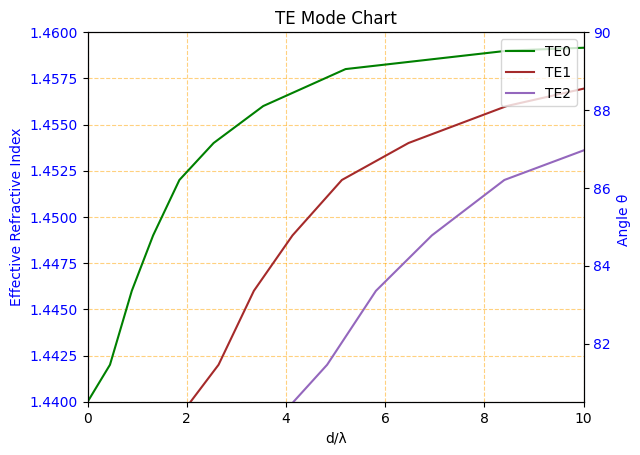

In [20]:
# @title TE Mode Chart
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'X': d_lamda,       # Common X-axis data
    'Y1': neff,   # Data for the first Y-axis
    'Y2': thetas # Data for the second Y-axis
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Create a plot with a primary y-axis
fig, ax1 = plt.subplots()

# Plotting the first data series in blue using the primary y-axis
color = 'blue'
ax1.set_xlabel('d/λ')
ax1.set_ylabel('Effective Refractive Index', color=color)  # Label for the first y-axis
ax1.set_ylim(n2, n1)
ax1.set_xlim(0,10)
# for m in modes:
#   data = {
#     'X': m,       # Common X-axis data
#     'Y1': neff,   # Data for the first Y-axis
#     'Y2': thetas # Data for the second Y-axis
# }
#   ax1.plot(, neff, color=color)
# ax1.plot(df['X'], df['Y1'], color=color)
# for m in modes:
#   ax1.plot(m, neff, color=color)
ax1.plot(d_lamda, neff, color="green",label='TE0')
ax1.plot(modes[0], neff, color="brown",label='TE1')
ax1.plot(modes[1], neff, color="tab:purple",label='TE2')
# ax1.plot(modes[2], neff, color=color)
# ax1.plot(modes[2], neff, color=color)
# ax1.plot(modes[3], neff, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for the same x-axis
ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
# Set the limits for the secondary y-axis

ax2.set_ylim(theta_c, 90)
color = 'blue'
ax2.set_ylabel('Angle θ ', color=color)  # Setting the label for the second y-axis
ax2.tick_params(axis='y', labelcolor=color)
# ax2.plot(d_lamda, thetas, color=color)
# ax2.plot(modes[0], thetas, color=color,)
# ax2.plot(modes[1], thetas, color=color)
# ax2.plot(modes[2], thetas, color=color)
# ax2.plot(modes[2], thetas, color=color)
# ax2.plot(modes[3], thetas, color=color)
ax1.grid(True, linestyle='--', which='both', color='orange', alpha=0.5)
# Adding legends
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
# Show the plot
plt.title('TE Mode Chart')
plt.show()



In [21]:
# @title determine the thickness, d of the waveguide core to ensure single mode guidance (only TE 0 mode will guide)
lambda_value_in_micro=1.55  # @param {type: "number"}
import math

# Display the equation
display(Math(r'd = \frac{\lambda}{2 \sqrt{n_1^2 - n_2^2}}'))



# Calculate d using the formula
d = round(lambda_value_in_micro / (2 * math.sqrt(n1**2 - n2**2)),3)

# print(f"Calculated value of {d} μm")
display(Math(r'd = \frac{%s}{2 \sqrt{%.2f^2 - %.2f^2}} = %.4f μm' % (lambda_value_in_micro, n1, n2, d)))



<IPython.core.display.Math object>

<IPython.core.display.Math object>